In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [579]:
products = pd.read_csv("../project_data/products.csv")
reviews = pd.read_csv("../project_data/reviews.csv")

products = products.drop(["Unnamed: 0"], axis=1)
reviews = reviews.drop(["Unnamed: 0"], axis=1)

In [580]:
# replacing non-dollar values with null
products["price"] = np.where(products['price'].str.contains('\$'), products['price'], np.nan)

In [581]:
# converting string prices to float
products['price'] = products['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [582]:
# looking for duplicate products
duplicates = products[products.duplicated('asin', keep=False)]
#duplicates

In [583]:
# drop duplicates
products.drop_duplicates(subset='asin', ignore_index=True, inplace=True)
products.head()

,asin,title,description,brand,date,price
0,B00006GNTW,HON Leather Executive Chair - Pillow-Soft Seri...,"[""Some chairs project significance, while othe...",HON,"December 3, 2004",55.99
1,B00006RVS4,HON 5991T T-Arms for ComforTask Series Swivel ...,['Fixed arms remain in place. Help reduce stra...,HON,NaN,NaN
2,B000078CRW,HON 5903AB90T Comfortask Multi-Task Swivel/Til...,['The ergonomic chair that fits you and your b...,HON,"May 10, 2006",34.99
3,B00009V438,"Furniture At Work(R) Wave Executive Chair , Black",[],Office Depot,"May 23, 2003",NaN
4,B0000AQNT6,"Safco Products SitStar Stool 6660BL, Black, Ch...",['Safco SitStar Stool features a height-adjust...,Safco Products,"November 1, 2000",28.39


In [584]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   asin         2072 non-null   object 
 1   title        2072 non-null   object 
 2   description  2072 non-null   object 
 3   brand        2032 non-null   object 
 4   date         1843 non-null   object 
 5   price        925 non-null    float64
dtypes: float64(1), object(5)
memory usage: 97.3+ KB


In [585]:
# drop reviews with no review text
reviews = reviews.dropna(subset=['reviewText'])

In [586]:
review_dup = reviews[reviews.duplicated(subset=['asin','reviewText'], keep=False)].sort_values(by='reviewText')
#print(review_dup)

In [587]:
# removing duplicate reviews for each product
reviews.drop_duplicates(subset=['asin','reviewText'], ignore_index=True,inplace=True)

In [588]:
# remove products that have no reviews
products = products[products['asin'].isin(reviews['asin'])]

In [589]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72909 entries, 0 to 72908
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   asin        72909 non-null  object 
 1   reviewerID  72909 non-null  object 
 2   overall     72909 non-null  float64
 3   summary     72903 non-null  object 
 4   reviewText  72909 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.8+ MB


In [590]:
prices = products['price'].dropna().tolist()

mean = np.average(prices)
stdv = np.std(prices)

print(mean)
print(stdv)

46.775772972972966
136.1462255766971


In [591]:
print(prices)

[55.99, 34.99, 28.39, 28.4, 14.19, 74.99, 28.4, 28.4, 21.29, 21.29, 28.4, 28.4, 28.4, 74.99, 42.61, 74.99, 89.0, 74.99, 28.39, 28.39, 42.61, 74.99, 12.67, 21.3, 14.19, 8.44, 8.44, 14.2, 21.3, 14.2, 21.29, 14.19, 28.4, 42.6, 28.39, 42.61, 28.39, 74.99, 21.3, 34.99, 8.43, 21.3, 28.39, 42.61, 21.3, 12.67, 21.29, 28.4, 28.4, 14.19, 14.19, 21.29, 172.54, 21.29, 8.43, 14.2, 7.8, 7.8, 8.43, 21.29, 28.39, 28.39, 34.99, 55.99, 74.99, 14.2, 74.99, 74.99, 21.29, 8.43, 12.67, 14.19, 21.29, 52.77, 21.29, 14.19, 12.67, 4.65, 55.99, 55.99, 28.4, 14.19, 12.66, 8.43, 21.29, 34.99, 12.66, 8.43, 14.2, 14.19, 34.99, 28.39, 21.29, 12.66, 74.99, 12.67, 28.4, 8.43, 8.43, 8.43, 7.8, 28.39, 28.39, 55.99, 21.29, 28.4, 14.2, 28.4, 14.2, 28.4, 21.3, 28.4, 21.3, 34.99, 21.29, 28.4, 1499.0, 21.29, 74.99, 28.4, 55.99, 42.61, 14.2, 21.3, 34.99, 28.4, 21.3, 4.64, 34.99, 55.99, 14.19, 74.99, 55.99, 55.99, 42.61, 28.39, 42.61, 42.61, 34.99, 55.99, 28.4, 34.99, 34.99, 28.4, 28.4, 55.99, 74.99, 42.61, 55.99, 34.99, 55.99,

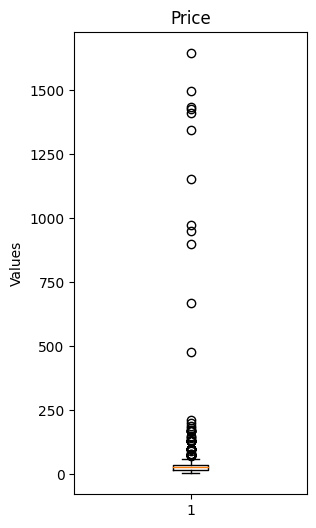

In [592]:

plt.figure(figsize=(3,6))
plt.boxplot(prices)
# Add labels and title
plt.ylabel('Values')
plt.title('Price')

# Show the plot
plt.show()

In [593]:
# Count the unique brande
unique_brands = products['brand'].value_counts()

unique_brands

brand
Flash Furniture         224
Boss Office Products    119
Office Star             113
HON                     109
OFM                      80
                       ... 
Seville Classics          1
9 to 5 Seating            1
Little Giant              1
Focal Upright             1
Office Star AVE SIX       1
Name: count, Length: 346, dtype: int64

In [594]:
# reviews per product
reviews_product = reviews['asin'].value_counts()
reviews_product

asin
B00XBC3BF0    3252
B00IFHPVEU    3018
B004XOK12Q    2130
B01D7P5QKS    1940
B00KUPS3JU    1775
              ... 
B00C8TDIZU       1
B00XOGA9BW       1
B00XOGA9OO       1
B00C78UA1C       1
B00B71W27K       1
Name: count, Length: 2072, dtype: int64

In [595]:

x = reviews_product.values.tolist()
avg = np.average(x)
stdv = np.std(x)
# min = min(x)
# max = max(x)

print(avg)
print(stdv)
print(min)
print(max)

35.18774131274131
159.32195853474246
0
2675


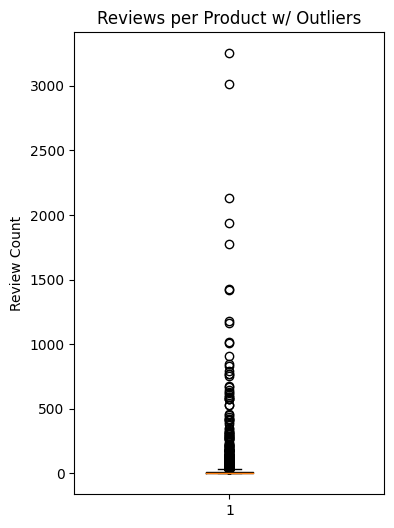

In [596]:
plt.figure(figsize=(4,6))
plt.boxplot(reviews_product.values)

plt.ylabel('Review Count')
plt.title('Reviews per Product w/ Outliers')

# Show the plot
plt.show()

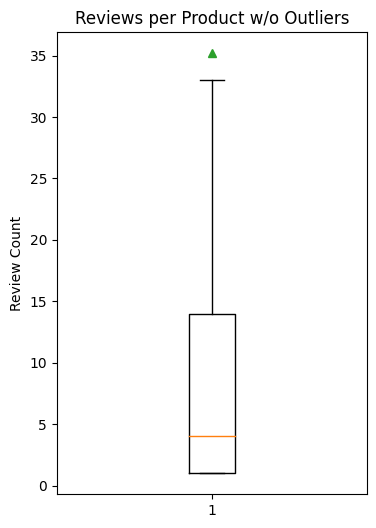

In [597]:
plt.figure(figsize=(4,6))
plt.boxplot(reviews_product.values, showfliers=False, showmeans=True)

plt.ylabel('Review Count')
plt.title('Reviews per Product w/o Outliers')

# Show the plot
plt.show()

In [598]:
# average rating for each product

average_ratings = reviews.groupby('asin')['overall'].mean().reset_index()
average_ratings.columns = ['Product_ID', 'Average_Rating']

average_ratings

,Product_ID,Average_Rating
0,B00006GNTW,4.178571
1,B00006RVS4,5.000000
2,B000078CRW,4.194805
3,B00009V438,3.400000
4,B0000AQNT6,4.285714
...,...,...
2067,B01HADR2IM,3.666667
2068,B01HB74CBC,4.140351
2069,B01HBAC0M2,4.100000
2070,B01HELS36U,4.500000


Text(0.5, 1.0, 'Number of Reviews by Rating')

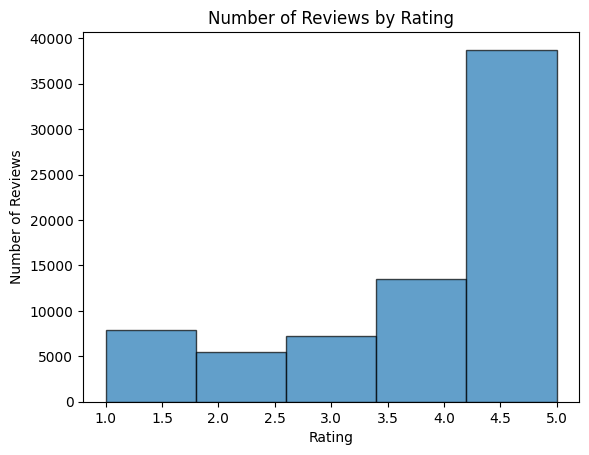

In [599]:
# rating distribution

plt.hist(reviews['overall'], bins=5, edgecolor='k', alpha=0.7)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Rating')

In [600]:
# saving dataframes with cleaned columns and original text to use with VADER. the below cells involve 
# cleaning the text to analyze word count

# reviews.to_csv("../project_data/reviews_for_vader.csv")
# products.to_csv("../project_data/products_clean.csv")

In [4]:
reviews = pd.read_csv('../project_data/reviews_for_vader.csv')

In [5]:
# removing punctuation, non-letter characters
import string

def preprocess(text):
    translator = str.maketrans('','', string.punctuation + string.digits)
    text = text.translate(translator)
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.strip()
    return text

reviews['reviewText'] = reviews['reviewText'].apply(preprocess)

In [6]:
import nltk
from nltk.tokenize import word_tokenize

# finding distribution of word count

reviews['word_count'] = reviews['reviewText'].apply(lambda text: len(word_tokenize(text)))

In [7]:
words = reviews['word_count'].tolist()

avg = np.average(words)
stdv = np.std(words)
shortest = np.min(words)
longest = np.max(words)

print(avg)
print(stdv)
print(shortest)
print(longest)

52.44454045453922
78.735562301443
0
2675


In [8]:
print(sorted(words))

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [9]:
# dropping rows with word count of 0. most of these reviews contain things like ':)' or '10/10' and were removed by the preprocessing
# they will be kept in for the VADER analysis and clustering but left out for now to analyze word distributions

reviews = reviews[reviews['word_count']>0]

In [10]:
reviews.sort_values(by=['word_count'], ascending=False)

,Unnamed: 0,asin,reviewerID,overall,summary,reviewText,word_count
25495,25495,B005KS6VDM,A1TCP92HBY4JXG,5.0,"Embody, Leap, Gesture Review",i purchased this chair with every intent to re...,2675
25555,25555,B005KS6VDM,A2NFSV7KGZAG0L,4.0,The Embody is a Good Investment,pros disappears when i work i feel the same as...,2210
29062,29062,B006H1QY9C,A2QO9C68XC4MNG,4.0,High quality chair with some issues,this is an excellent quality chair with a few ...,1871
25560,25560,B005KS6VDM,A3JQWMA4SH17PX,2.0,Like one of the other reviews has stated,like one of the other reviews has stated i too...,1869
25641,25641,B005KS6YHA,A3JQWMA4SH17PX,2.0,"I really wanted to like this chair, now I am s...",like one of the other reviews has stated i too...,1868
...,...,...,...,...,...,...,...
40998,40998,B00E97HOMC,A3B9DXBHI653CF,5.0,Five Stars,good,1
61891,61891,B00YB1HN18,A3E5SUSQI2L7S5,3.0,Three Stars,ok,1
29663,29663,B006J4CYU0,A3QMG2A4ZGALI7,5.0,Five Stars,comfortable,1
29668,29668,B006J4CYU0,A3G8FJI0EPHKG4,5.0,Five Stars,good,1


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72902 entries, 0 to 72908
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  72902 non-null  int64  
 1   asin        72902 non-null  object 
 2   reviewerID  72902 non-null  object 
 3   overall     72902 non-null  float64
 4   summary     72896 non-null  object 
 5   reviewText  72902 non-null  object 
 6   word_count  72902 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.4+ MB


In [12]:
clean_text = reviews['reviewText'].tolist()
clean_text

['positives comfortable chair and a fairly good value for the pricei work from home a lot so a good office chair is vital the chair that this one replaced lasted  years hopefully this one will have a similar lifespan the armrests are shaped padded and positioned well casters roll smoothly on carpet padding on seat and back is thick and seems resilient so far the outer fabric also seems to be durable  negatives the instructions for assembly were minimal though the assembly itself wasnt difficult there were no instructions at all for adjustment recline tension and so forth the back could be a little taller to rest my head on and the seat could be a little longer to support my leg when crossed esp when theres a dog on my lap',
 'while this chair is very nice unfortunately it was not as well padded as i had expected  i had sat in the exact same model at a business office that i was in last year  it was the most comfortable chair i had ever sat in i actually turned the chair over to get the

In [19]:
from nltk.corpus import stopwords
from collections import defaultdict

# nltk.download('stopwords')
nltk_stpwrds = stopwords.words('english')
addl_stpwrds = ['chair','chairs']
stop_words = set(nltk_stpwrds+addl_stpwrds)

# Create a dictionary to store document frequency
document_frequency = defaultdict(int)

# Tokenize, remove stopwords, and count document frequency
for review in clean_text:
    words = word_tokenize(review)
    #words = [word for word in words if word not in stop_words]  # Remove stopwords
    unique_words = set(words)  # Get unique words in the sentence
    for word in unique_words:
        document_frequency[word] += 1

total_reviews = len(clean_text)

doc_freq_percent = {term: (freq/total_reviews) for term, freq in document_frequency.items()}

sorted_result = {term: freq for term, freq in sorted(doc_freq_percent.items(), key=lambda item: item[1], reverse=True)}

# Print the document frequency of terms
count = 0
for term, df in sorted_result.items():
    print(f' {term} : {df}')
    count+=1

print("Total terms:", count)


 chair : 0.6285972949987655
 and : 0.624687937230803
 the : 0.615003703602096
 it : 0.5504650078187155
 to : 0.5475569943211435
 a : 0.5151161833694549
 i : 0.5131546459630737
 for : 0.4710844695618776
 is : 0.4627993745027571
 this : 0.4414693698389619
 my : 0.34328276316150447
 comfortable : 0.3300732490192313
 of : 0.32948341609283693
 in : 0.329373679734438
 very : 0.3128857918849963
 but : 0.2955748813475625
 not : 0.28497160571726426
 was : 0.2729829085621794
 that : 0.24888206084881073
 on : 0.2407890044168884
 back : 0.2395819044745
 with : 0.23926641244410304
 easy : 0.22099530877067844
 have : 0.21502839428273574
 great : 0.21243587281556062
 so : 0.20873227071959616
 its : 0.19539930317412416
 good : 0.1810512743134619
 you : 0.1776768812926943
 at : 0.1754272859455159
 as : 0.17251927244794382
 be : 0.16867849990398068
 one : 0.16155935365284904
 seat : 0.15249238704013607
 like : 0.15062686894735397
 are : 0.14852816109297412
 had : 0.14497544648980823
 would : 0.144879427

In [16]:
# with stop words: 34814
# with out: 34670


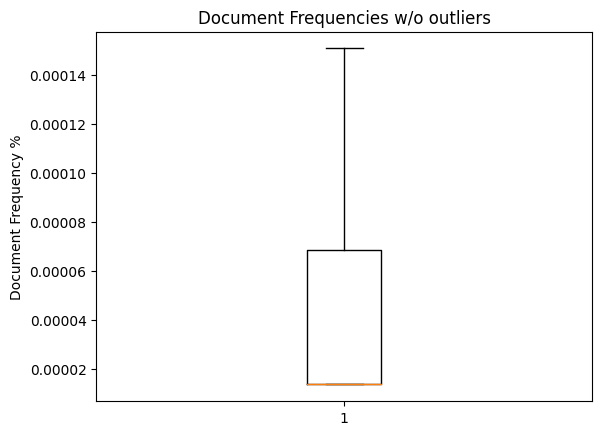

In [284]:
plt.boxplot(doc_freq_percent.values(), showfliers=False)

# Add labels and title
plt.ylabel('Document Frequency %')
plt.title('Document Frequencies w/o outliers')

# Show the plot
plt.show()